In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data getting, cleaning, and exploring
import wrangle as w
import explore as ex

# Python without these is hard
import pandas as pd
import numpy as np
from pydataset import data
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
# Regression Modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = w.wrangle_zillow(cached=True)

In [3]:
a = pd.DataFrame(df.columns)
a

,0
0,heating_system_type_id
1,bathrooms
2,bedrooms
3,prop_sqft
4,fips
5,fireplace_cnt
6,latitude
7,longitude
8,lot_sqft
9,pool_cnt


In [4]:
df.shape

(60240, 35)

In [5]:
w.missing_zero_values_table(df)

Your selected dataframe has 35 columns and 60240 Rows.
There are 0 columns that have NULL values.


,Zero Values,NULL Values,% of Total NULL Values,Total Zero's plus NULL Values,% Total Zero's plus NULL Values,Data Type
heating_system_type_id,0,0,0.0,0,0.0,int64
acres,0,0,0.0,0,0.0,float64
orange_cnty,42482,0,0.0,42482,70.5,uint8
ventura_cnty,54661,0,0.0,54661,90.7,uint8
log_error_class,0,0,0.0,0,0.0,category
age,0,0,0.0,0,0.0,float64
age_bin,668,0,0.0,668,1.1,float64
taxrate,0,0,0.0,0,0.0,float64
acres_bin,6327,0,0.0,6327,10.5,float64
heating_system_desc,0,0,0.0,0,0.0,object


In [6]:
binary_vars = ['pool_cnt', 'fireplace_flag','la_cnty', 'orange_cnty', 'ventura_cnty', 'cola']
categorical_vars = ['heating_system_type_id', 'fips', 'fireplace_cnt', \
                    'heating_system_desc', 'region_id_city', 'acres_bin', 'sqft_bin',\
                    'structure_dollar_sqft_bin']
quant_vars = [ 'bathrooms', 'bedrooms', 'prop_sqft', 'lot_sqft', 'year_built',\
              'struct_tax_value', 'tax_value', 'land_tax_value', 'tax_amount', \
              'structure_dollar_per_sqft', 'bath_bed_ratio']
categorical_target = 'log_error_class'
continuous_target = 'log_error'

In [7]:
train, validate, test = w.train_validate_test_split(df, 'log_error', seed=42)

In [8]:
train, validate, test = w.train_validate_test_scale(train, validate, test, quant_vars)

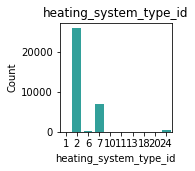

    heating_system_type_id  Count  Percent
2                        2  25910    76.81
7                        7   7104    21.06
6                       24    356     1.06
24                       6    265     0.79
20                      13     51     0.15
13                      20     29     0.09
18                       1      8     0.02
1                       18      8     0.02
10                      10      2     0.01
11                      11      1     0.00
_________________________________________________________________


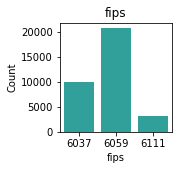

      fips  Count  Percent
6037  6059  20732    61.46
6059  6037   9908    29.37
6111  6111   3094     9.17
_________________________________________________________________


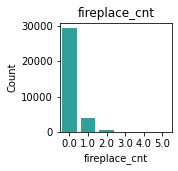

     fireplace_cnt  Count  Percent
0.0            0.0  29311    86.89
1.0            1.0   3845    11.40
2.0            2.0    483     1.43
3.0            4.0     86     0.25
4.0            3.0      8     0.02
5.0            5.0      1     0.00
_________________________________________________________________


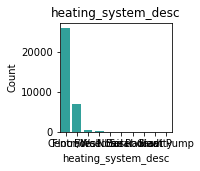

           heating_system_desc  Count  Percent
Central                Central  25910    76.81
Floor/Wall          Floor/Wall   7104    21.06
Forced air                 Yes    356     1.06
Yes                 Forced air    265     0.79
Solar                     None     51     0.15
None                     Solar     29     0.09
Radiant              Baseboard      8     0.02
Baseboard              Radiant      8     0.02
Gravity                Gravity      2     0.01
Heat Pump            Heat Pump      1     0.00
_________________________________________________________________


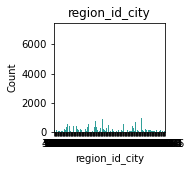

       region_id_city  Count  Percent
12447           37086   7102    21.05
46298           26964   1098     3.25
5534            52650    984     2.92
52650           30908    856     2.54
40227           12447    789     2.34
...               ...    ...      ...
6822            53206      1     0.00
34037           13232      1     0.00
53162           34037      1     0.00
50569           38334      1     0.00
31134            6822      1     0.00

[182 rows x 3 columns]
_________________________________________________________________


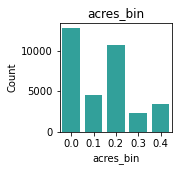

     acres_bin  Count  Percent
0.2        0.0  12748    37.79
0.1        0.2  10685    31.67
0.3        0.1   4543    13.47
0.0        0.4   3492    10.35
0.4        0.3   2266     6.72
_________________________________________________________________


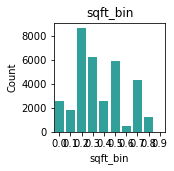

     sqft_bin  Count  Percent
0.4       0.2   8607    25.51
0.3       0.3   6265    18.57
0.2       0.5   5888    17.45
0.5       0.7   4293    12.73
0.1       0.4   2587     7.67
0.6       0.0   2533     7.51
0.7       0.1   1857     5.50
0.0       0.8   1228     3.64
0.8       0.6    473     1.40
0.9       0.9      3     0.01
_________________________________________________________________


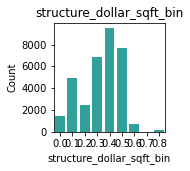

     structure_dollar_sqft_bin  Count  Percent
0.4                        0.4   9480    28.10
0.3                        0.5   7647    22.67
0.2                        0.3   6822    20.22
0.1                        0.1   4915    14.57
0.5                        0.2   2501     7.41
0.0                        0.0   1434     4.25
0.6                        0.6    760     2.25
0.7                        0.8    160     0.47
0.8                        0.7     15     0.04
_________________________________________________________________


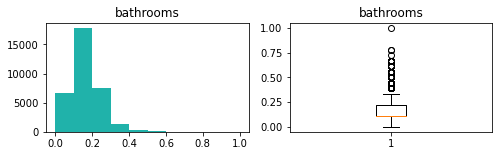

count    33734.000000
mean         0.134651
std          0.093924
min          0.000000
25%          0.111111
50%          0.111111
75%          0.222222
max          1.000000
Name: bathrooms, dtype: float64


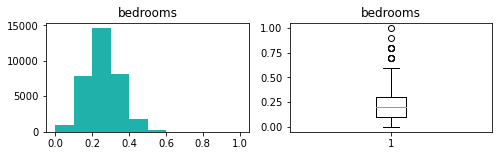

count    33734.000000
mean         0.209080
std          0.094858
min          0.000000
25%          0.100000
50%          0.200000
75%          0.300000
max          1.000000
Name: bedrooms, dtype: float64


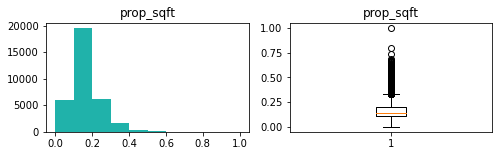

count    33734.000000
mean         0.163299
std          0.077436
min          0.000000
25%          0.109806
50%          0.144433
75%          0.197855
max          1.000000
Name: prop_sqft, dtype: float64


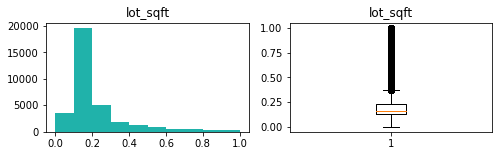

count    33734.000000
mean         0.217540
std          0.169359
min          0.000000
25%          0.130128
50%          0.164133
75%          0.228822
max          1.000000
Name: lot_sqft, dtype: float64


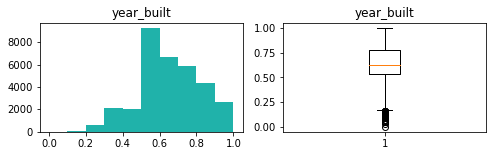

count    33734.000000
mean         0.646322
std          0.169578
min          0.000000
25%          0.536232
50%          0.630435
75%          0.782609
max          1.000000
Name: year_built, dtype: float64


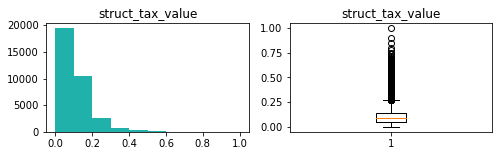

count    33734.000000
mean         0.108877
std          0.084121
min          0.000000
25%          0.053177
50%          0.086812
75%          0.138682
max          1.000000
Name: struct_tax_value, dtype: float64


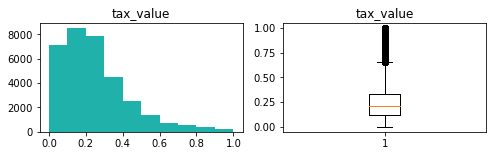

count    33734.000000
mean         0.250581
std          0.184274
min          0.000000
25%          0.116572
50%          0.214280
75%          0.332705
max          1.000000
Name: tax_value, dtype: float64


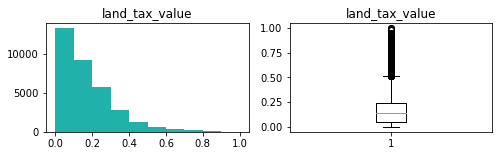

count    33734.000000
mean         0.167595
std          0.145532
min          0.000000
25%          0.052515
50%          0.135707
75%          0.237726
max          1.000000
Name: land_tax_value, dtype: float64


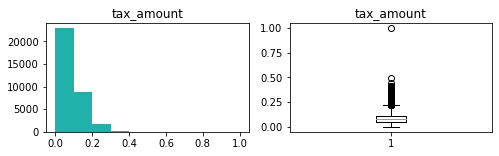

count    33734.000000
mean         0.087470
std          0.060761
min          0.000000
25%          0.044507
50%          0.074966
75%          0.113538
max          1.000000
Name: tax_amount, dtype: float64


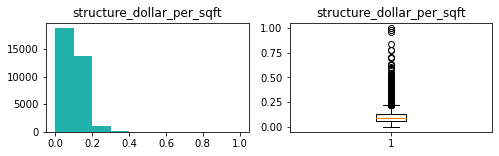

count    33734.000000
mean         0.099624
std          0.054973
min          0.000000
25%          0.063248
50%          0.093336
75%          0.127033
max          1.000000
Name: structure_dollar_per_sqft, dtype: float64


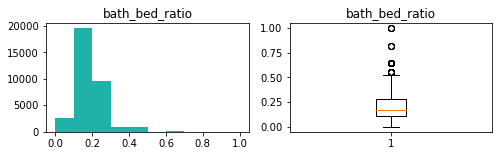

count    33734.000000
mean         0.193771
std          0.095268
min          0.000000
25%          0.107143
50%          0.166667
75%          0.285714
max          1.000000
Name: bath_bed_ratio, dtype: float64


In [9]:
ex.explore_univariate(train, categorical_vars, quant_vars)

pool_cnt 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=87997080.5, pvalue=1.3267458963794445e-08)
        chi2       p-value  degrees of freedom
0  47.346197  2.933493e-10                   3

expected:
              0            1            2            3
0  6926.525167  6995.380566  6929.803996  6800.290271
1  1523.474833  1538.619434  1524.196004  1495.709729


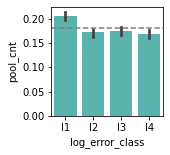


_____________________

fireplace_flag 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=64068624.0, pvalue=0.21249831712877565)
        chi2       p-value  degrees of freedom
0  50.326362  6.807584e-11                   3

expected:
              0            1            2            3
0  7342.086619  7415.073042  7345.562163  7208.278176
1  1107.913381  1118.926958  1108.437837  1087.721824


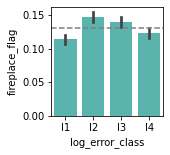


_____________________

la_cnty 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=137912549.0, pvalue=0.0003182613425983845)
         chi2       p-value  degrees of freedom
0  328.014803  8.584110e-71                   3

expected:
              0           1            2            3
0  3256.859548  3289.23543  3258.401257  3197.503765
1  5193.140452  5244.76457  5195.598743  5098.496235


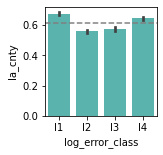


_____________________

orange_cnty 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=115817424.0, pvalue=0.006510145490682447)
        chi2       p-value  degrees of freedom
0  269.79682  3.415263e-58                   3

expected:
              0            1            2            3
0  5968.153791  6027.482184  5970.978953  5859.385071
1  2481.846209  2506.517816  2483.021047  2436.614929


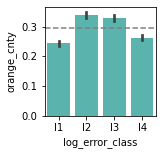


_____________________

ventura_cnty 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=46482843.0, pvalue=0.07560888678827839)
        chi2   p-value  degrees of freedom
0  23.955566  0.000026                   3

expected:
             0            1           2            3
0  7674.98666  7751.282386  7678.61979  7535.111164
1   775.01334   782.717614   775.38021   760.888836


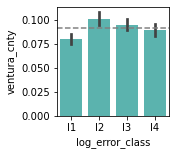


_____________________

cola 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=96685341.5, pvalue=0.0037242555214341343)
         chi2       p-value  degrees of freedom
0  358.637602  2.010519e-77                   3

expected:
              0            1            2            3
0  6671.026264  6737.341792  6674.184147  6549.447797
1  1778.973736  1796.658208  1779.815853  1746.552203


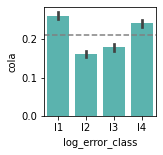


_____________________

bathrooms 
____________________



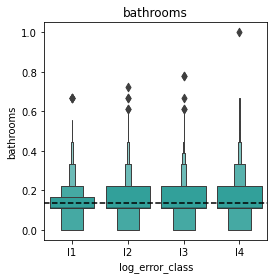

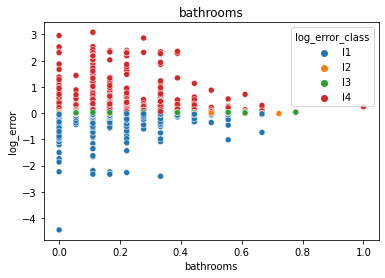

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.123281     0.136103     0.140045     0.139244
std                 0.092577     0.087873     0.089853     0.103876
min                 0.000000     0.000000     0.000000     0.000000
25%                 0.111111     0.111111     0.111111     0.111111
50%                 0.111111     0.111111     0.111111     0.111111
75%                 0.166667     0.222222     0.222222     0.222222
max                 0.666667     0.722222     0.777778     1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.055025245922495566, pvalue=4.804765041658385e-24)

____________________

bedrooms 
____________________



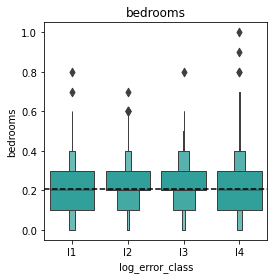

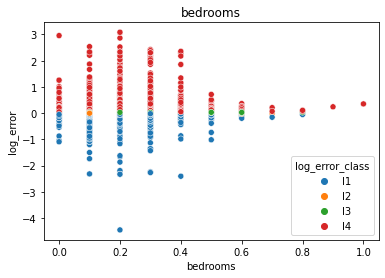

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.199018     0.210698     0.213532     0.213127
std                 0.092019     0.090801     0.094352     0.101347
min                 0.000000     0.000000     0.000000     0.000000
25%                 0.100000     0.200000     0.200000     0.100000
50%                 0.200000     0.200000     0.200000     0.200000
75%                 0.300000     0.300000     0.300000     0.300000
max                 0.800000     0.700000     0.800000     1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.050576736525608665, pvalue=1.4728721870184677e-20)

____________________

prop_sqft 
____________________



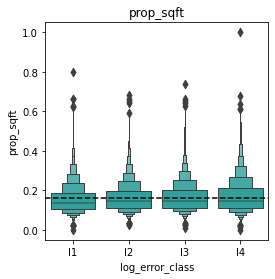

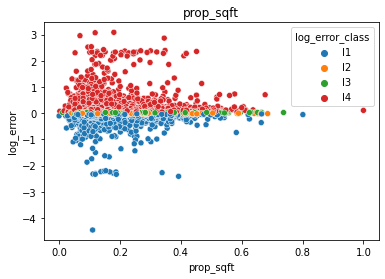

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.155129     0.161555     0.165585     0.171085
std                 0.074033     0.072653     0.075072     0.086557
min                 0.000000     0.027477     0.011440     0.002451
25%                 0.104928     0.110521     0.113381     0.111134
50%                 0.137283     0.144791     0.147651     0.149234
75%                 0.185061     0.195914     0.200613     0.211236
max                 0.801021     0.685291     0.737487     1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.06698126041850155, pvalue=7.456353383828937e-35)

____________________

lot_sqft 
____________________



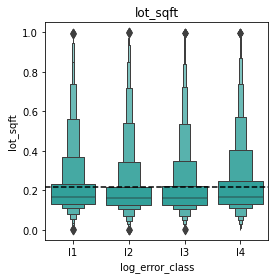

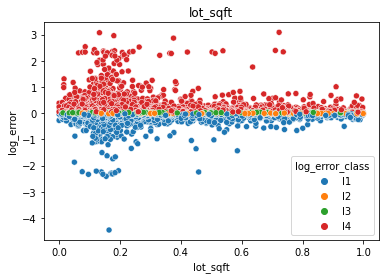

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.220624     0.210963     0.212243     0.226562
std                 0.170144     0.165454     0.165447     0.175887
min                 0.000000     0.000000     0.000000     0.000000
25%                 0.132968     0.128037     0.127881     0.131913
50%                 0.165493     0.162285     0.162709     0.168077
75%                 0.231237     0.217687     0.223179     0.246317
max                 0.999026     1.000000     0.997129     0.998951 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.0057478430880526146, pvalue=0.29112107641167295)

____________________

year_built 
____________________



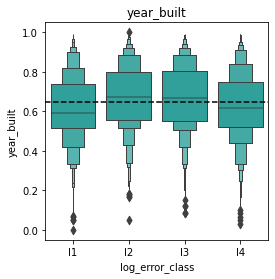

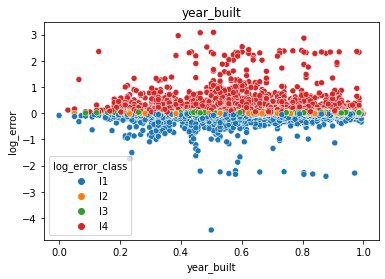

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.614314     0.672903     0.670858     0.626578
std                 0.171046     0.162166     0.164835     0.172134
min                 0.000000     0.050725     0.086957     0.028986
25%                 0.514493     0.557971     0.550725     0.521739
50%                 0.594203     0.673913     0.666667     0.615942
75%                 0.739130     0.797101     0.804348     0.746377
max                 0.992754     1.000000     0.992754     0.992754 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.028141350305491017, pvalue=2.347176711396063e-07)

____________________

struct_tax_value 
____________________



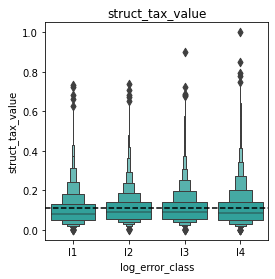

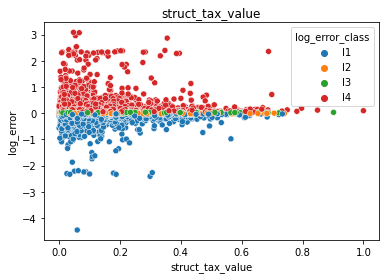

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.103124     0.109767     0.112286     0.110346
std                 0.081258     0.078212     0.082680     0.093512
min                 0.000000     0.000509     0.000588     0.000013
25%                 0.049892     0.057184     0.056460     0.048772
50%                 0.082059     0.090202     0.091409     0.084189
75%                 0.129200     0.139899     0.143405     0.140689
max                 0.733662     0.740325     0.901797     1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.013459986591095074, pvalue=0.013428752320237462)

____________________

tax_value 
____________________



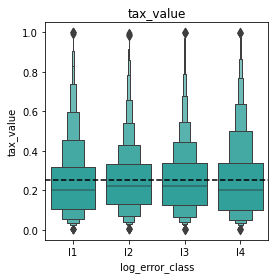

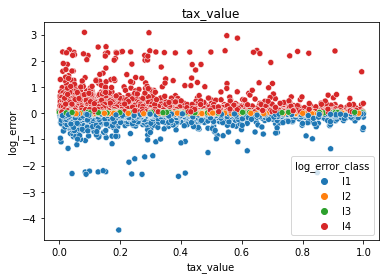

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.243862     0.251912     0.253640     0.252939
std                 0.189271     0.169110     0.174186     0.202984
min                 0.002665     0.002609     0.000769     0.000000
25%                 0.106918     0.131842     0.128318     0.102111
50%                 0.200373     0.225169     0.223959     0.202401
75%                 0.319715     0.331509     0.337608     0.341107
max                 0.999737     0.994862     1.000000     0.999603 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.002611502242537909, pvalue=0.63148844392881)

____________________

land_tax_value 
____________________



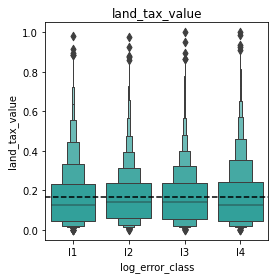

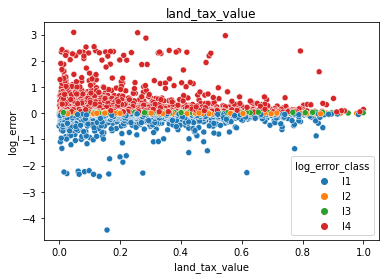

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.166047     0.168149     0.167518     0.168683
std                 0.152525     0.134520     0.136470     0.157595
min                 0.000000     0.002428     0.001767     0.002105
25%                 0.046789     0.062727     0.057936     0.044196
50%                 0.127312     0.143958     0.142180     0.125263
75%                 0.233143     0.237265     0.238530     0.242142
max                 0.983398     0.977682     0.999264     1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.0063132157373123115, pvalue=0.2462502263982934)

____________________

tax_amount 
____________________



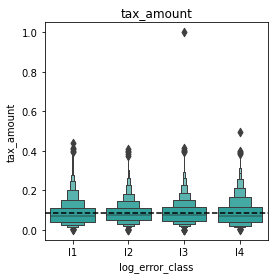

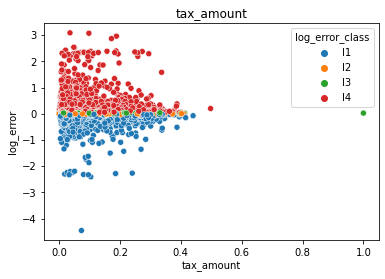

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.085261     0.088024     0.088704     0.087894
std                 0.061910     0.055837     0.058413     0.066471
min                 0.002575     0.000000     0.000180     0.001331
25%                 0.041938     0.049190     0.047646     0.038978
50%                 0.070578     0.077994     0.078182     0.071271
75%                 0.109046     0.112802     0.115795     0.115952
max                 0.440199     0.408968     1.000000     0.497803 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.00030257322033183664, pvalue=0.9556835559603484)

____________________

structure_dollar_per_sqft 
____________________



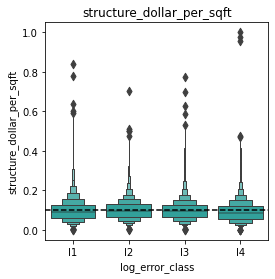

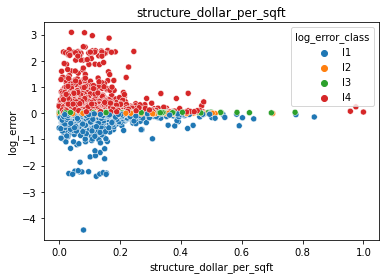

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.099442     0.102211     0.101622     0.095111
std                 0.058406     0.051232     0.053505     0.056272
min                 0.000209     0.001065     0.000188     0.000000
25%                 0.060844     0.067772     0.066449     0.056810
50%                 0.092033     0.096524     0.096156     0.087830
75%                 0.126830     0.129686     0.128890     0.122777
max                 0.838503     0.702014     0.775410     1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.03074446727493601, pvalue=1.6241385895681497e-08)

____________________

bath_bed_ratio 
____________________



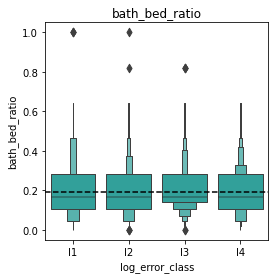

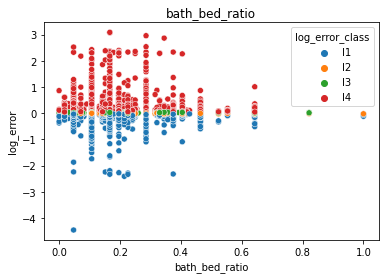

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.190235     0.194380     0.196180     0.194291
std                 0.098514     0.093048     0.092123     0.097209
min                 0.000000     0.000000     0.000000     0.000000
25%                 0.107143     0.107143     0.142857     0.107143
50%                 0.166667     0.166667     0.166667     0.166667
75%                 0.285714     0.285714     0.285714     0.285714
max                 1.000000     1.000000     0.821429     0.642857 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.017663172782047487, pvalue=0.0011774147240621428)

____________________



In [10]:
ex.explore_bivariate(train, categorical_target, continuous_target, binary_vars, quant_vars)

In [11]:
sns.scatterplot(data=train[train.la_cnty == 1] y=continuous_target, x='bathrooms', hue='age_bin')
plt.title('LA')
plt.show()
sns.scatterplot(data=train[train.orange_cnty == 1], y=continuous_target, x='bathrooms', hue='pool_cnt')
plt.title("Orange County")
plt.show()
sns.scatterplot(data=train[train.ventura_cnty == 1], y=continuous_target, x='bathrooms', hue='pool_cnt')
plt.title('Ventura County')
plt.show()

SyntaxError: invalid syntax (<ipython-input-11-c6a5fac137fa>, line 1)

# Kmeans

In [ ]:
from sklearn.cluster import KMeans

## pool_cnt and log_error in The City of Los Angeles

In [ ]:
X = train[train.cola == 1]

In [ ]:
X_scaled = X[['pool_cnt','log_error']]

In [ ]:
# define the model
kmeans = KMeans(n_clusters=3)

# fit the model
kmeans.fit(X_scaled)

# make predictions
kmeans.predict(X_scaled)

In [ ]:
X['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

X.head()

In [ ]:
kmeans.cluster_centers_

In [ ]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = ['pool_cnt','log_error'])
centroids_scaled

In [ ]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'pool_cnt', y = 'log_error', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'pool_cnt', y = 'log_error', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

## fireplace count vs log error in properties with a central heating system 

In [ ]:
X = train[train.heating_system_type_id == 2] 

In [ ]:
X_scaled = X[['fireplace_cnt','log_error']]

In [ ]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
# define the model
kmeans = KMeans(n_clusters=4)

# fit the model
kmeans.fit(X_scaled)

# make predictions
kmeans.predict(X_scaled)

In [ ]:
X['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

X.head()

In [ ]:
kmeans.cluster_centers_

In [ ]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = ['fireplace_cnt','log_error'])
centroids_scaled


In [ ]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'fireplace_cnt', y = 'log_error', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'fireplace_cnt', y = 'log_error', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

## Lot size and log error in Ventura county

In [ ]:
X = train[train.fips == 6111] 

In [ ]:
X_scaled = X[['lot_sqft','log_error']]

In [ ]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
# define the model
kmeans = KMeans(n_clusters=5)

# fit the model
kmeans.fit(X_scaled)

# make predictions
kmeans.predict(X_scaled)

In [ ]:
X['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

In [ ]:
kmeans.cluster_centers_

In [ ]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = ['lot_sqft','log_error'])
centroids_scaled


In [ ]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'lot_sqft', y = 'log_error', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'lot_sqft', y = 'log_error', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

## Lot size and log error in Orange county

In [ ]:
X = train[train.fips == 6059] 

In [ ]:
X_scaled = X[['lot_sqft','log_error']]

In [ ]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
# define the model
kmeans = KMeans(n_clusters=5)

# fit the model
kmeans.fit(X_scaled)

# make predictions
kmeans.predict(X_scaled)

In [ ]:
X['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

In [ ]:
kmeans.cluster_centers_

In [ ]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = ['lot_sqft','log_error'])
centroids_scaled


In [ ]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'lot_sqft', y = 'log_error', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'lot_sqft', y = 'log_error', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

## Lot size and log error in LA county

In [ ]:
X = train[train.fips == 6037] 

In [ ]:
X_scaled = X[['lot_sqft','log_error']]

In [ ]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
# define the model
kmeans = KMeans(n_clusters=5)

# fit the model
kmeans.fit(X_scaled)

# make predictions
kmeans.predict(X_scaled)

In [ ]:
X['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

In [ ]:
kmeans.cluster_centers_

In [ ]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = ['lot_sqft','log_error'])
centroids_scaled


In [ ]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'lot_sqft', y = 'log_error', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'lot_sqft', y = 'log_error', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

## Lot size and log error in LA City

In [ ]:
X = train[train.cola == 1] 

In [ ]:
X_scaled = X[['lot_sqft','log_error']]

In [ ]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
# define the model
kmeans = KMeans(n_clusters=5)

# fit the model
kmeans.fit(X_scaled)

# make predictions
kmeans.predict(X_scaled)

In [ ]:
X['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

In [ ]:
kmeans.cluster_centers_

In [ ]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = ['lot_sqft','log_error'])
centroids_scaled


In [ ]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'lot_sqft', y = 'log_error', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'lot_sqft', y = 'log_error', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [28]:
from sklearn.cluster import KMeans

In [30]:
X_scaled = train[['tax_value','prop_sqft']] 

In [31]:
# define the model
kmeans = KMeans(n_clusters=4)

# fit the model
kmeans.fit(X_scaled)

# make predictions
kmeans.predict(X_scaled)

array([3, 0, 0, ..., 0, 3, 0], dtype=int32)

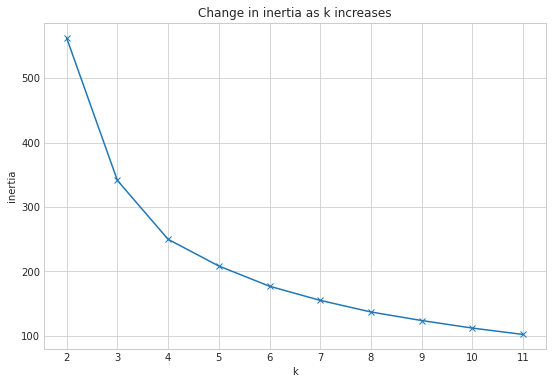

In [32]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [33]:
X['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

,tax_value,prop_sqft,cluster
parcelid,,,
14610791,0.228345,0.095506,3
11583704,0.416406,0.116139,0
14298103,0.495834,0.238917,0
11580695,0.157128,0.316650,3
12867887,0.098856,0.156078,1


In [34]:
kmeans.cluster_centers_

array([[0.43360457, 0.21943332],
       [0.09137122, 0.13086249],
       [0.74395569, 0.29096389],
       [0.24749223, 0.14927432]])

In [35]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = ['tax_value','prop_sqft'])
centroids_scaled


,tax_value,prop_sqft
0,0.433605,0.219433
1,0.091371,0.130862
2,0.743956,0.290964
3,0.247492,0.149274


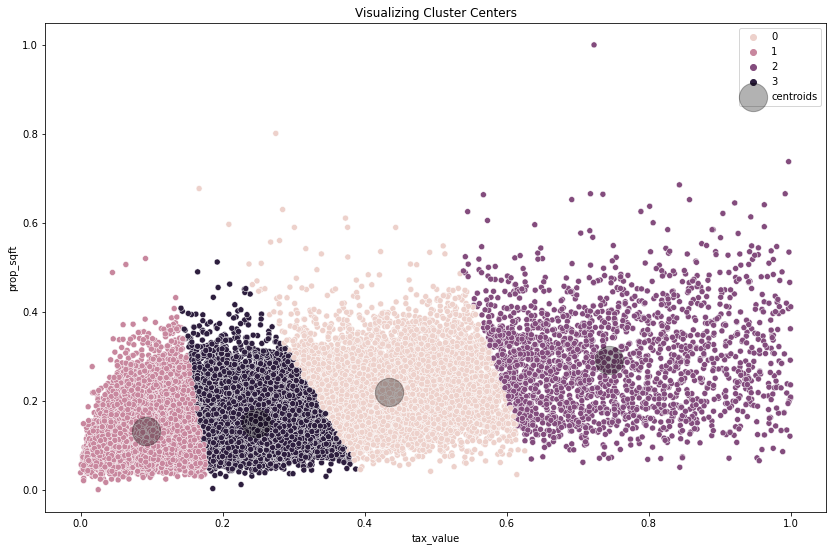

In [36]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'tax_value', y = 'prop_sqft', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'tax_value', y = 'prop_sqft', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [37]:
X_scaled.head()

,tax_value,prop_sqft,cluster
parcelid,,,
14610791,0.228345,0.095506,3
11583704,0.416406,0.116139,0
14298103,0.495834,0.238917,0
11580695,0.157128,0.316650,3
12867887,0.098856,0.156078,1
